In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
from src.test import Tester

In [3]:
import numpy as np
from PIL import Image

In [4]:
from src.datasets import ALOVDataset

In [5]:
from torchvision import transforms

In [6]:
from src.helper import FromTensor, ToTensor, Normalize, show_batch

In [7]:
%matplotlib inline

In [63]:
model_weights ='checkpoints/model_n_epoch_10_loss_6.762.pth'
save_directory = ''
data_directory ='../ALOV/Frames/07-MotionCoherence/07-MotionCoherence_video00001/'

In [11]:
transform = transforms.Compose([Normalize(), ToTensor()])
alov = ALOVDataset('../ALOV/Frames/',
                            '../ALOV/GT/',
                            transform)

In [27]:
from_tensor = FromTensor()

In [28]:
ix = from_tensor(alov[0])

prevbb:  [360.72, 54.8, 400.8, 134.56]
currbb:  [367.12, 49.68, 407.2, 129.44]


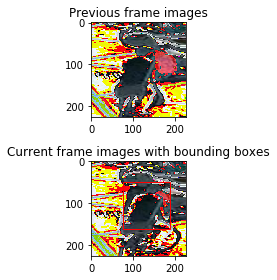

In [60]:
show_batch(alov[40])

In [61]:
img = Image.open('../ALOV/Frames/07-MotionCoherence/07-MotionCoherence_video00001/00000001.jpg')

In [54]:
ann = '1 229 150 421 150 421 411 229 411'
ann = ann.strip().split(' ')
left = min(float(ann[1]), float(ann[3]), float(ann[5]), float(ann[7]))
top = min(float(ann[2]), float(ann[4]), float(ann[6]), float(ann[8]))
right = max(float(ann[1]), float(ann[3]), float(ann[5]), float(ann[7]))
bottom = max(float(ann[2]), float(ann[4]), float(ann[6]), float(ann[8]))
init_box = [left, top, right, bottom]

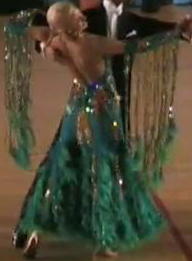

In [55]:
img.crop(init_box)

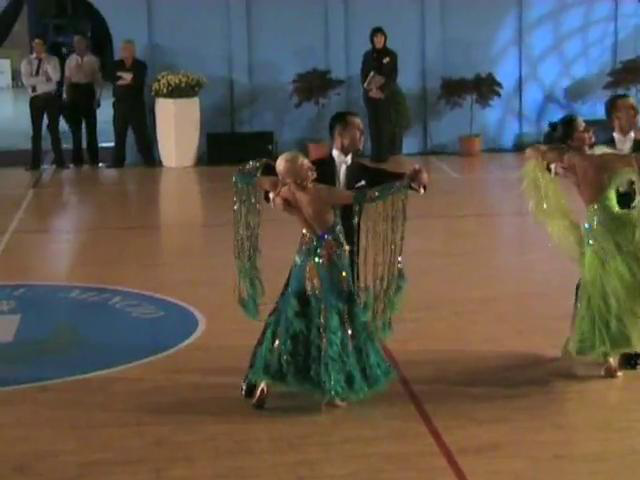

In [53]:
img

In [74]:
tester = Tester(data_directory, model_weights, np.array(init_box), save_directory)

In [75]:
len(tester.x)

195

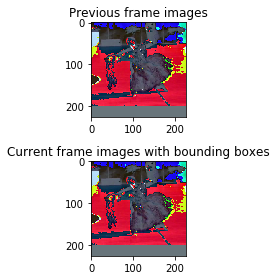

In [77]:
show_batch(tester[100])

In [78]:
from IPython.display import HTML

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())

In [79]:
display_animation(tester.animated_test())

Testing frame # 1
Testing frame # 2
Testing frame # 3
Testing frame # 4
